In [16]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Do not forget to connect to GPU runtime before training**

In [17]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [18]:
X_train.shape

(35000, 32, 32, 3)

In [19]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [20]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [21]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

"\nYou have got some experience form last assignment '\nUse that experience this time\n"

In [22]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [23]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer: Batch normalization is a technique of standardizing the output of a neural network layer by setting its mean to zero and standard deviation to 1.
        It can be done for each mini-batch separately or by using a running average.
        As the input data varies throughout the mini-batches, it may slowdown the training as the model is trying to adjust to data that is varying continuously.This continuous variation
        in input data is called internal covarite shift. It makes it difficult to converge to the global minima of loss function.

        In order to sort this we use Batch Normalization.It smoothens the process of learning, as the model is now input with data that has similar distribution.So the model does not have
        to adjust to new data continuously. It also allows the use higher learning rates as training is more stable now. Because of normalization, the input given to the model in different
        has similar distribution. It helps to reduce generalization error ie overfitting is reduced.



Sources:<https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/>
        <https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/>
        <https://towardsdatascience.com/batch-normalisation-in-deep-neural-network-ce65dd9e8dbf#:~:text=Batch%20normalization%20solves%20a%20major,you%20can%20often%20remove%20dropout.>

"""

'\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the\nproblem it is used for? [ Answer in atleast 300 words]\n<cite your sources>\n\nAnswer: Batch normalization is a technique of standardizing the output of a neural network layer by setting its mean to zero and standard deviation to 1.\n        It can be done for each mini-batch separately or by using a running average.\n        As the input data varies throughout the mini-batches, it may slowdown the training as the model is trying to adjust to data that is varying continuously.This continuous variation\n        in input data is called internal covarite shift. It makes it difficult to converge to the global minima of loss function.\n\n        In order to sort this we use Batch Normalization.It smoothens the process of learning, as the model is now input with data that has similar distribution.So the model does not have\n        to adjust to new data continuously. It also allows the use higher learning rate

In [24]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [25]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers

model.add(tf.keras.layers.Conv2D(16,(3,3), activation = 'relu' , input_shape = (32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
#model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Flatten())


model.add(tf.keras.layers.Dense(128, activation = 'relu'))
# model.add(tf.keras.layers.Dense(64, activation = 'relu'))
# model.add(tf.keras.layers.Dense(48, activation = 'relu'))
# model.add(tf.keras.layers.Dense(32, activation = 'relu'))



# model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))
# model.add(tf.keras.layers.MaxPooling2D((2,2)))

# model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))
# model.add(tf.keras.layers.MaxPooling2D((2,2)))

# model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))



In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 15, 15, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                      

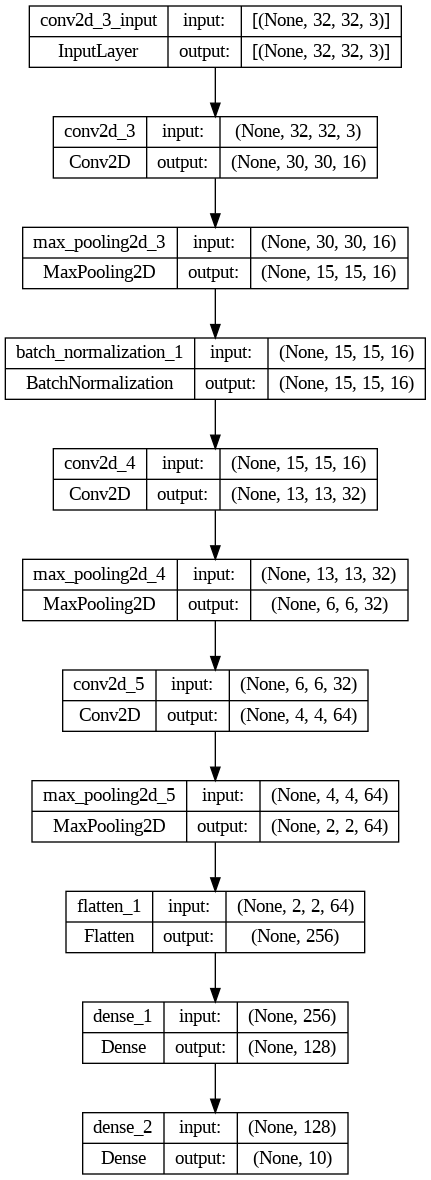

In [27]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

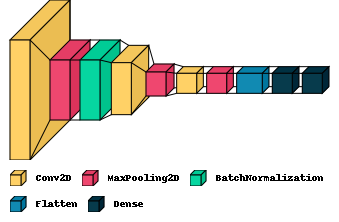

In [28]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [29]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [30]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10 ,validation_data = validation_data)

Epoch 1/5
1094/1094 [==============================] - 44s 37ms/step - loss: 1.8246 - accuracy: 0.1020 - val_loss: 1.6392 - val_accuracy: 0.0877
Epoch 2/5
1094/1094 [==============================] - 29s 26ms/step - loss: 1.5769 - accuracy: 0.0966 - val_loss: 1.5012 - val_accuracy: 0.1036
Epoch 3/5
1094/1094 [==============================] - 30s 28ms/step - loss: 1.4986 - accuracy: 0.0939 - val_loss: 1.4534 - val_accuracy: 0.1240
Epoch 4/5
1094/1094 [==============================] - 29s 27ms/step - loss: 1.4465 - accuracy: 0.0945 - val_loss: 1.4052 - val_accuracy: 0.0883
Epoch 5/5
1094/1094 [==============================] - 31s 28ms/step - loss: 1.4019 - accuracy: 0.0957 - val_loss: 1.3856 - val_accuracy: 0.0833


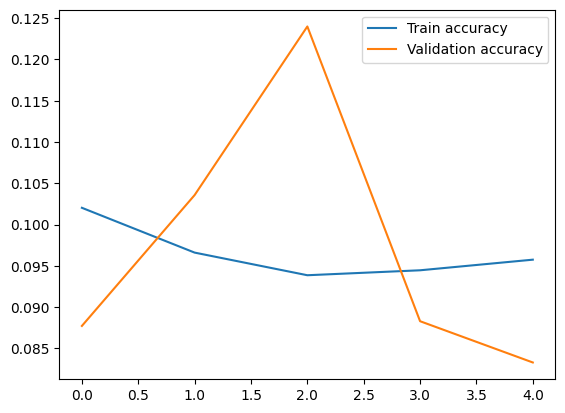

In [31]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [32]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 2s 4ms/step - loss: 1.2840 - accuracy: 0.0907


[1.2839833498001099, 0.09073333442211151]

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**